In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_excel("C:/Users/chira/Desktop/Portfolio/New folder/Superstore Sales.xlsx", sheet_name = 'Orders')
pd.set_option('display.max_columns', None)

In [3]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,40544,40549,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,40544,40551,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,40544,40548,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,40544,40548,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,40544,40551,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,42004,42008,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,42004,42009,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,42004,42006,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,42004,42010,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [4]:
# Parsing Excel Serial Date to Datetime
df['order_date'] = pd.to_datetime(df['order_date'], unit='D', origin='1899-12-30')
df['ship_date'] = pd.to_datetime(df['ship_date'], unit='D', origin='1899-12-30')

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.duplicated().sum()

0

## Data Info 

In [7]:
df.shape

(51290, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [9]:
df['sub_category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [10]:
df['ship_mode'].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [11]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [12]:
df['year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

## Data Exploration 

## 1. Best month for sales

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['month'] = df['order_date'].dt.month
best_month = df.groupby(['month'],as_index=False)['sales'].sum().sort_values('sales', ascending = False)
best_month
#Combined for all 4 years

,month,sales
11,12,1580780.77270
10,11,1551277.34152
8,9,1437380.11036
7,8,1293833.16532
5,6,1269716.75364
9,10,1168184.38628
4,5,904012.33818
2,3,770500.94126
6,7,749381.83672
3,4,698561.21184


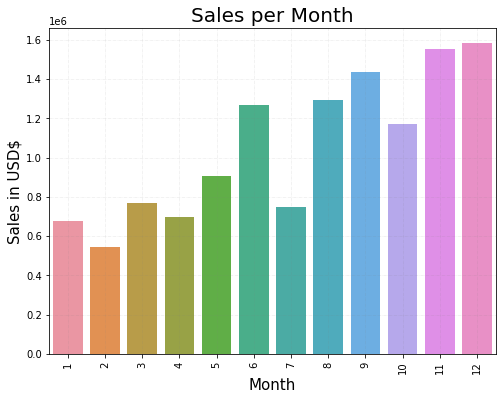

In [14]:
plt.figure(figsize = (8,6))
plt.rcParams["figure.autolayout"] = True

sns.barplot(x = best_month['month'], y =best_month['sales'])
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.xticks(rotation = 'vertical')
plt.xlabel(xlabel = 'Month', fontsize = 15)
plt.ylabel(ylabel = 'Sales in USD$', fontsize = 15)
plt.title('Sales per Month', fontsize = 20)
plt.show()

In [15]:
#Year wise data
FY2011 = df[df['year']==2011]
FY2012 = df[df['year']==2012]
FY2013 = df[df['year']==2013]
FY2014 = df[df['year']==2014]

In [16]:
fy11 = FY2011.groupby(['month'], as_index = False)['sales'].sum().sort_values('sales', ascending = False)

In [17]:
fy12 = FY2012.groupby(['month'], as_index = False)['sales'].sum().sort_values('sales', ascending = False)

In [18]:
fy13 = FY2013.groupby(['month'], as_index = False)['sales'].sum().sort_values('sales', ascending = False)

In [19]:
fy14 = FY2014.groupby(['month'], as_index = False)['sales'].sum().sort_values('sales', ascending = False)

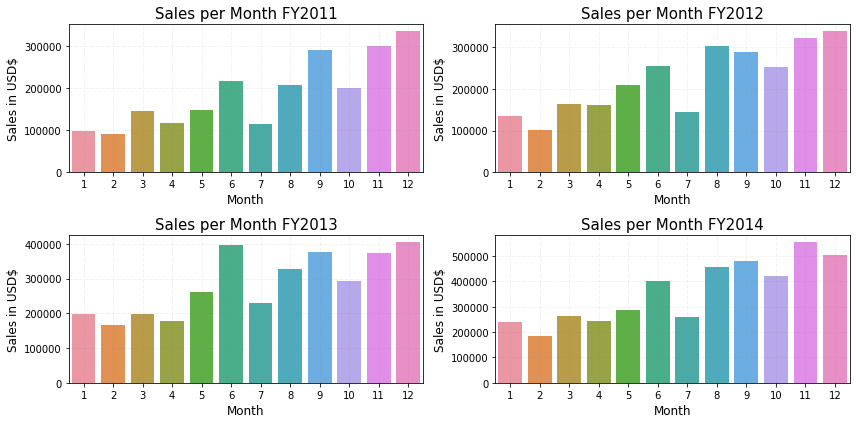

In [20]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
sns.barplot(x = fy11['month'], y = fy11['sales'])
plt.title('Sales per Month FY2011', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(2,2,2)
sns.barplot(x = fy12['month'], y = fy12['sales'])
plt.title('Sales per Month FY2012', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(2,2,3)
sns.barplot(x = fy13['month'], y = fy13['sales'])
plt.title('Sales per Month FY2013', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(2,2,4)
sns.barplot(x = fy14['month'], y = fy14['sales'])
plt.title('Sales per Month FY2014', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

## 2. Best selling category

In [21]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30000,2,0.00000,106.14000,35.46000,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.36600,3,0.10000,36.03600,9.72000,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12000,4,0.00000,29.64000,8.17000,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86500,3,0.50000,-26.05500,4.82000,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67000,5,0.10000,37.77000,4.70000,Medium,2011,1


In [22]:
category = df.groupby(['category'],as_index = False)[['sales', 'profit', 'quantity']].sum().sort_values('sales', ascending= False)
category

,category,sales,profit,quantity
2,Technology,4744557.49808,663778.73318,35176
0,Furniture,4110874.18630,286782.25380,34954
1,Office Supplies,3787070.22550,518473.83430,108182


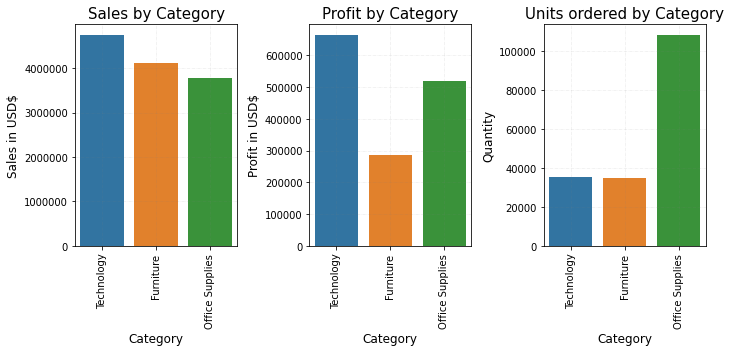

In [23]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,3,1)
sns.barplot(x = category['category'], y = category['sales'])
plt.title('Sales by Category', fontsize = 15)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(1,3,2)
sns.barplot(x = category['category'], y = category['profit'])
plt.title('Profit by Category', fontsize = 15)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Profit in USD$', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(1,3,3)
sns.barplot(x = category['category'], y = category['quantity'])
plt.title('Units ordered by Category', fontsize = 15)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.show()

## 3. Best selling Sub-category & most profitable Sub-Category

In [24]:
sc = df.groupby(['sub_category'], as_index = False)[['sales', 'profit', 'quantity']].sum().sort_values('sales', ascending = False)
sc

,sub_category,sales,profit,quantity
13,Phones,1706824.13920,216717.00580,11870
6,Copiers,1509436.27328,258567.54818,7454
5,Chairs,1501681.76420,141973.79750,12336
4,Bookcases,1466572.24180,161924.41950,8310
14,Storage,1127085.86140,108461.48980,16917
1,Appliances,1011064.30500,141680.58940,6078
11,Machines,779060.06710,58867.87300,4906
16,Tables,757041.92440,-64083.38870,3083
0,Accessories,749237.01850,129626.30620,10946
3,Binders,461911.50570,72449.84600,21429


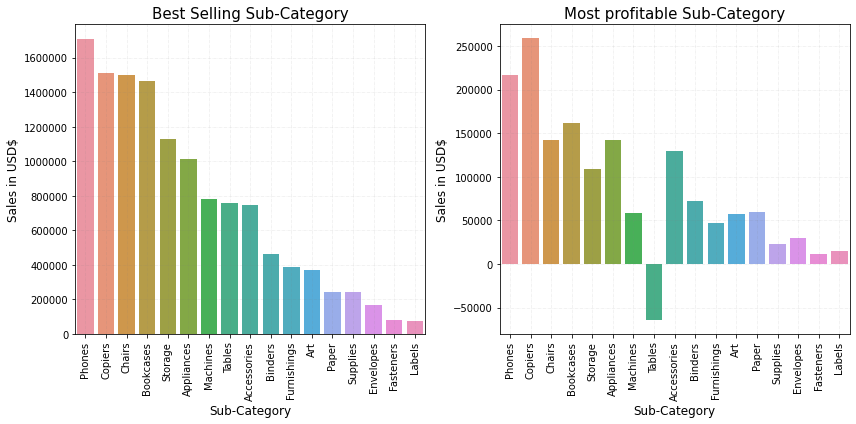

In [25]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,2,1)
sns.barplot(x = sc['sub_category'], y = sc['sales'])
plt.title('Best Selling Sub-Category', fontsize = 15)
plt.xlabel('Sub-Category', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(1,2,2)
sns.barplot(x = sc['sub_category'], y = sc['profit'])
plt.title('Most profitable Sub-Category', fontsize = 15)
plt.xlabel('Sub-Category', fontsize = 12)
plt.ylabel('Sales in USD$', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.show()

## 4. Top selling Sub-Category

In [26]:
top = sc[['sub_category', 'quantity']].sort_values('quantity', ascending = False)
top

,sub_category,quantity
3,Binders,21429
14,Storage,16917
2,Art,16301
12,Paper,12822
5,Chairs,12336
13,Phones,11870
9,Furnishings,11225
0,Accessories,10946
10,Labels,9322
15,Supplies,8543


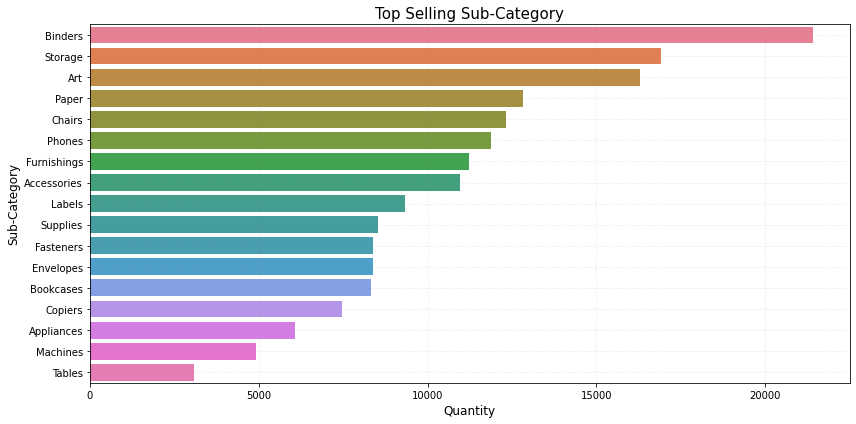

In [27]:
plt.rcParams["figure.figsize"] = [12, 6]
sns.barplot(data = top, y = 'sub_category', x = 'quantity', palette = "husl")
plt.title('Top Selling Sub-Category', fontsize = 15)
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Sub-Category', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.show()

In [28]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30000,2,0.00000,106.14000,35.46000,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.36600,3,0.10000,36.03600,9.72000,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12000,4,0.00000,29.64000,8.17000,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86500,3,0.50000,-26.05500,4.82000,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67000,5,0.10000,37.77000,4.70000,Medium,2011,1


## 5. Most profitable region  and how much sales were made in them

In [29]:
country = df.groupby(['region'], as_index = False)[['profit', 'sales']].sum().sort_values('profit', ascending = False)
country

,region,profit,sales
3,Central,311403.98164,2822302.51994
7,North,194597.95252,1248165.60252
8,North Asia,165578.42100,848309.78100
10,South,140355.76618,1600907.04088
4,Central Asia,132480.18700,752826.56700
9,Oceania,121666.64200,1100184.61200
12,West,108418.44890,725457.82450
6,East,91522.78000,678781.24000
0,Africa,88871.63100,783773.21100
5,EMEA,43897.97100,806161.31100


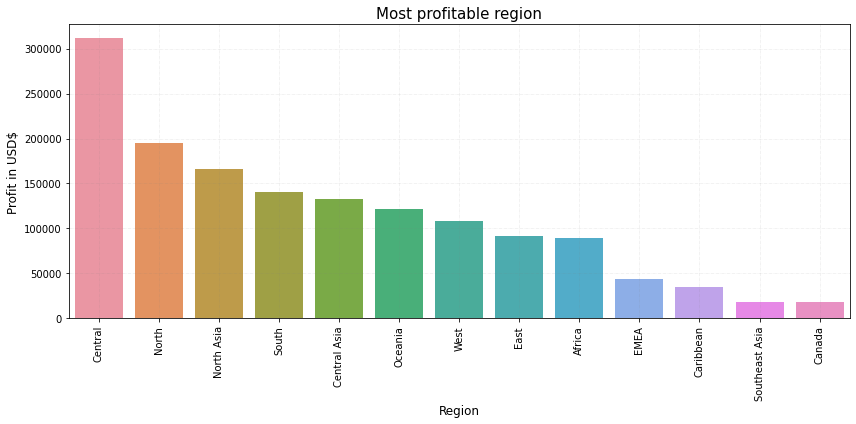

In [30]:
sns.barplot(x = country['region'], y = country['profit'])
plt.title('Most profitable region', fontsize = 15)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Profit in USD$', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

## 6. Top and Bottom 10 Countries with most amount of sales

In [31]:
country_sales = df.groupby(['country'], as_index = False)[['sales', 'quantity']].sum().sort_values('sales',ascending = False)
top10 = country_sales[:10]
#Top 10
top10

,country,sales,quantity
139,United States,2297200.86030,37873
6,Australia,925235.85300,10673
44,France,858931.08300,10804
26,China,700562.02500,7081
47,Germany,628840.03050,7745
81,Mexico,622590.61752,10011
57,India,589650.10500,5758
138,United Kingdom,528576.30000,6161
58,Indonesia,404887.49790,5237
17,Brazil,361106.41896,6148


In [32]:
#Bottom 10
bottom10 = country_sales[-10:]
bottom10

,country,sales,quantity
42,Ethiopia,850.62000,18
137,United Arab Emirates,744.12000,37
9,Bahrain,669.18000,6
122,Swaziland,288.03000,5
19,Burundi,267.72000,4
127,Tajikistan,242.78400,14
75,Macedonia,209.64000,6
40,Eritrea,187.74000,4
5,Armenia,156.75000,3
39,Equatorial Guinea,150.51000,3


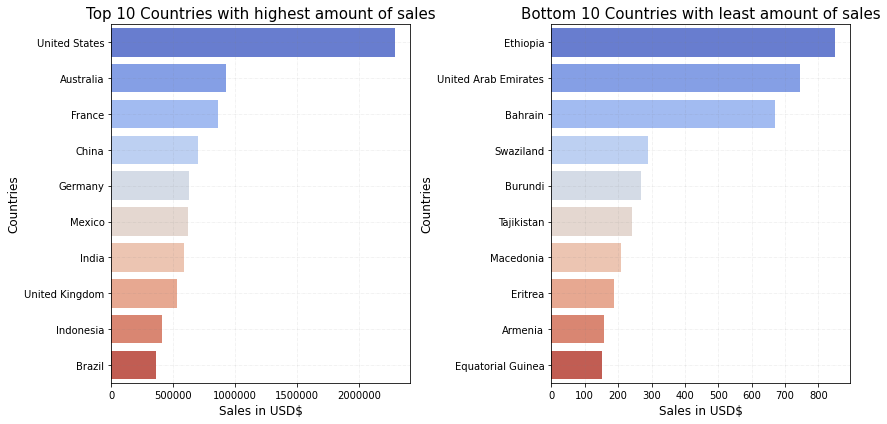

In [33]:
plt.subplot(1,2,1)
sns.barplot(y = top10['country'], x = top10['sales'], palette = 'coolwarm')
plt.title('Top 10 Countries with highest amount of sales', fontsize = 15)
plt.xlabel('Sales in USD$', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.subplot(1,2,2)
sns.barplot(y = bottom10['country'], x = bottom10['sales'], palette = 'coolwarm')
plt.title('Bottom 10 Countries with least amount of sales', fontsize = 15)
plt.xlabel('Sales in USD$', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.show()

## 7. Most preffered shipping mode

In [34]:
df['ship_mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

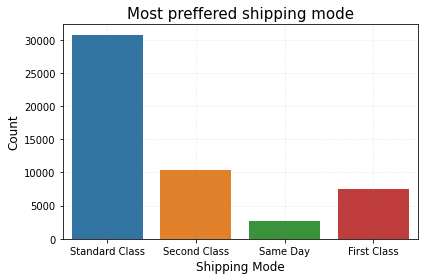

In [35]:
plt.figure(figsize = (6,4))
sns.countplot(x = df['ship_mode'])
plt.title('Most preffered shipping mode', fontsize = 15)
plt.xlabel('Shipping Mode', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.show()

## 8. Most profitable Segment

In [36]:
segment = df.groupby(['segment'], as_index = False)[['sales', 'profit']].sum().sort_values('profit',ascending =False)
segment

,segment,sales,profit
0,Consumer,6507949.41786,749239.78206
1,Corporate,3824697.52146,442785.85866
2,Home Office,2309854.97056,277009.18056


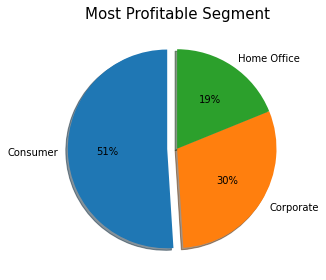

In [37]:
plt.figure(figsize = (6,4))
explode = [0.1,0,0]
plt.pie(segment.profit, explode=explode, labels=segment.segment, startangle = 90, autopct = "%1.0f%%", shadow = True)
plt.title('Most Profitable Segment', fontsize = 15)
plt.show()

## 9. What is the priority for majority of orders?

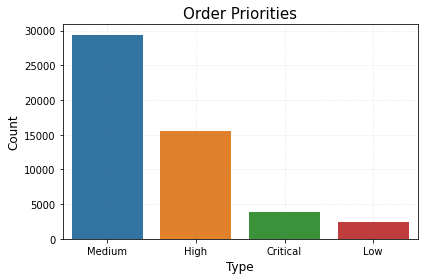

In [38]:
plt.figure(figsize = (6,4))
sns.countplot(x = df['order_priority'])
plt.title('Order Priorities', fontsize = 15)
plt.xlabel('Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
plt.show()

In [39]:
df.corr()

,sales,quantity,discount,profit,shipping_cost,year,month
sales,1.00000,0.31358,-0.08672,0.48594,0.76807,-0.00290,0.00182
quantity,0.31358,1.00000,-0.01987,0.10474,0.27265,-0.00505,0.02061
discount,-0.08672,-0.01987,1.00000,-0.31637,-0.07906,-0.00589,0.00003
profit,0.48594,0.10474,-0.31637,1.00000,0.35703,0.00266,-0.00016
shipping_cost,0.76807,0.27265,-0.07906,0.35703,1.00000,-0.00314,0.00493
year,-0.00290,-0.00505,-0.00589,0.00266,-0.00314,1.00000,-0.01419
month,0.00182,0.02061,0.00003,-0.00016,0.00493,-0.01419,1.00000


Text(0.5, 1.0, 'Correlation Heatmap')

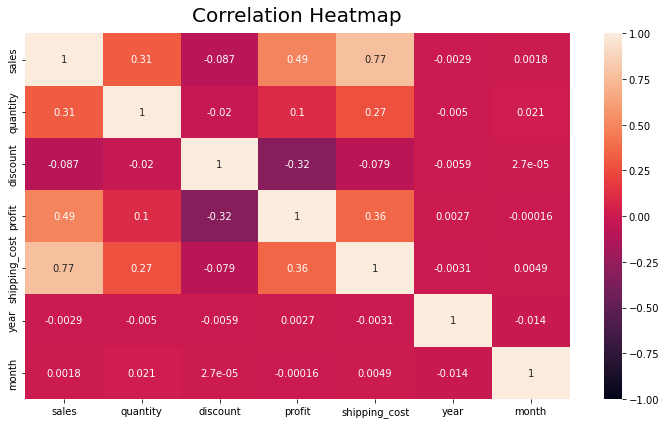

In [40]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot =  True, cbar = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In [41]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30000,2,0.00000,106.14000,35.46000,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.36600,3,0.10000,36.03600,9.72000,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12000,4,0.00000,29.64000,8.17000,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86500,3,0.50000,-26.05500,4.82000,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67000,5,0.10000,37.77000,4.70000,Medium,2011,1


## 10. What products were sold together most often?

In [42]:
dup = df[df['order_id'].duplicated(keep =False)]
dup[['order_id', 'order_date', 'ship_date', 'product_id', 'category', 'sub_category', 'product_name']].sort_values('order_id').head(20)

,order_id,order_date,ship_date,product_id,category,sub_category,product_name
5863,AE-2011-9160,2011-10-03,2011-10-07,TEC-EPS-10004171,Technology,Machines,"Epson Calculator, Red"
5858,AE-2011-9160,2011-10-03,2011-10-07,OFF-FEL-10001405,Office Supplies,Storage,"Fellowes File Cart, Industrial"
29864,AE-2013-1130,2013-10-14,2013-10-14,FUR-BUS-10003055,Furniture,Bookcases,"Bush Stackable Bookrack, Pine"
29915,AE-2013-1130,2013-10-14,2013-10-14,OFF-ACC-10004278,Office Supplies,Fasteners,"Accos Paper Clips, Bulk Pack"
33748,AE-2013-1530,2013-12-31,2014-01-03,OFF-STI-10000114,Office Supplies,Supplies,"Stiletto Letter Opener, High Speed"
33744,AE-2013-1530,2013-12-31,2014-01-03,OFF-TEN-10002817,Office Supplies,Storage,"Tenex Folders, Blue"
50089,AE-2014-3830,2014-12-13,2014-12-19,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP"
50094,AE-2014-3830,2014-12-13,2014-12-19,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue"
50102,AE-2014-3830,2014-12-13,2014-12-19,OFF-ROG-10003993,Office Supplies,Storage,"Rogers File Cart, Single Width"
50112,AE-2014-3830,2014-12-13,2014-12-19,OFF-AVE-10000357,Office Supplies,Binders,"Avery Binder Covers, Clear"


In [43]:
dup['grouped'] = dup.groupby('order_id')['product_name'].transform(lambda x: '~'.join(x))
dup.head()

dup = dup[['order_id', 'grouped']].drop_duplicates()
dup

C:\Users\chira\AppData\Local\Temp\ipykernel_1572\3139337362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['grouped'] = dup.groupby('order_id')['product_name'].transform(lambda x: '~'.join(x))


,order_id,grouped
1,IN-2011-47883,"Acme Trimmer, High Speed~Eldon Light Bulb, Duo..."
7,IN-2011-79397,"Hoover Microwave, White~Avery Color Coded Labe..."
8,ID-2011-80230,"Hewlett Wireless Fax, Laser~Hon Rocking Chair,..."
9,IZ-2011-4680,"Novimex Swivel Stool, Set of Two~Cameo Interof..."
10,IN-2011-65159,"Tenex Lockers, Industrial~Chromcraft Round Tab..."
...,...,...
51244,IT-2014-3715679,"StarTech Phone, Red~BIC Pencil Sharpener, Fluo..."
51247,IN-2014-23754,"Enermax Numeric Keypad, Bluetooth~Ames Busines..."
51263,MX-2014-110527,"Nokia Office Telephone, Cordless~Kleencut Rule..."
51273,MX-2014-114783,"Fellowes Folders, Blue~Hon Legal Exhibit Label..."


In [71]:
from itertools import combinations
from collections import Counter

final = []

count = Counter()

for row in dup['grouped']:
    row_list = row.split('~')
    count.update(Counter(combinations(row_list, 2)))

#count.most_common()
for key, value in count.most_common():
    product = key
    number = value
    final.append({'Product': product, 'Count': number})

In [72]:
pd.DataFrame(final)

,Product,Count
0,"(Staples, Staples)",5
1,(Fellowes Stor/Drawer Steel Plus Storage Drawe...,3
2,"(Binney & Smith Highlighters, Water Color, Ten...",3
3,"(Sharp Copy Machine, Color, Apple Office Telep...",3
4,"(Acco Binding Machine, Recycled, Acco Binder, ...",3
...,...,...
52980,"(Nokia Office Telephone, Cordless, Kleencut Ru...",1
52981,"(Nokia Office Telephone, Cordless, Hon Color C...",1
52982,"(Kleencut Ruler, High Speed, Hon Color Coded L...",1
52983,"(Fellowes Folders, Blue, Hon Legal Exhibit Lab...",1


In [45]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30000,2,0.00000,106.14000,35.46000,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.36600,3,0.10000,36.03600,9.72000,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12000,4,0.00000,29.64000,8.17000,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.86500,3,0.50000,-26.05500,4.82000,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67000,5,0.10000,37.77000,4.70000,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90400,2,0.20000,4.51880,0.89000,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99000,1,0.00000,0.42000,0.49000,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40000,3,0.00000,12.36000,0.35000,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12000,1,0.00000,0.56000,0.19900,Medium,2014,12
